# One-way ANOVA

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

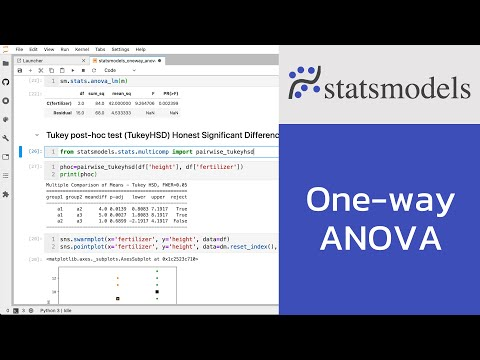

In [44]:
from IPython.display import YouTubeVideo
YouTubeVideo('8SXnfq8RJsU', width=720, height=405)

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [46]:
import statsmodels.api as sm # hypothesis testing
import statsmodels.formula.api as smf # ols

In [47]:
# print(f'pandas     version: {pd.__version__}')
# print(f'seaborn    version: {sns.__version__}')
# print(f'statmodels version: {sm.__version__}')

In [48]:
# pd.Timestamp.now()

## read data (fertilizer on plant growth)
data source: https://en.wikipedia.org/wiki/One-way_analysis_of_variance#Analysis_summary

In [49]:
# a1-a3 คือ ปุ๋ยที่ต่างชนิดกัน
url='https://github.com/prasertcbs/basic-dataset/raw/master/anova_one_way_wide_format.csv'
df=pd.read_csv(url)
df

,a1,a2,a3
0,6,8,13
1,8,12,9
2,4,9,11
3,5,11,8
4,3,6,7
5,4,8,12


In [50]:
df=df.melt(var_name='fertilizer', value_name='height') # ทำให้เป็น long format
df

,fertilizer,height
0,a1,6
1,a1,8
2,a1,4
3,a1,5
4,a1,3
5,a1,4
6,a2,8
7,a2,12
8,a2,9
9,a2,11


In [51]:
df.describe()

,height
count,18.00000
mean,8.00000
std,2.99018
min,3.00000
25%,6.00000
50%,8.00000
75%,10.50000
max,13.00000


In [52]:
df.groupby('fertilizer').describe()

height                                              
            count  mean       std  min   25%   50%    75%   max
fertilizer                                                     
a1            6.0   5.0  1.788854  3.0  4.00   4.5   5.75   8.0
a2            6.0   9.0  2.190890  6.0  8.00   8.5  10.50  12.0
a3            6.0  10.0  2.366432  7.0  8.25  10.0  11.75  13.0

In [53]:
dm=df.groupby('fertilizer').mean()
dm

,height
fertilizer,
a1,5.0
a2,9.0
a3,10.0


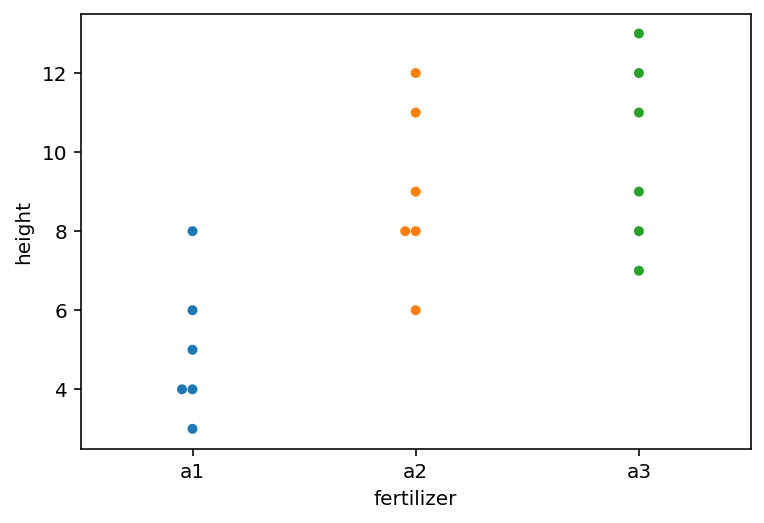

In [54]:
sns.swarmplot(x='fertilizer', y='height', data=df);

In [55]:
dm.reset_index()

,fertilizer,height
0,a1,5.0
1,a2,9.0
2,a3,10.0


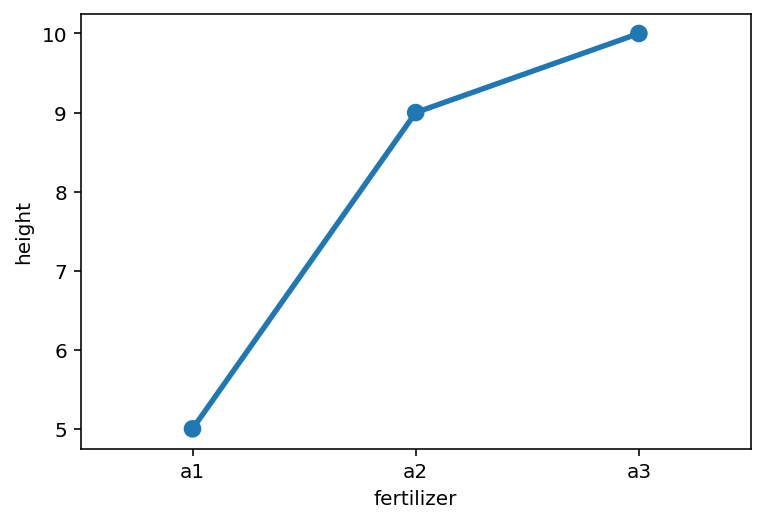

In [56]:
sns.pointplot(x='fertilizer', y='height', data=dm.reset_index());

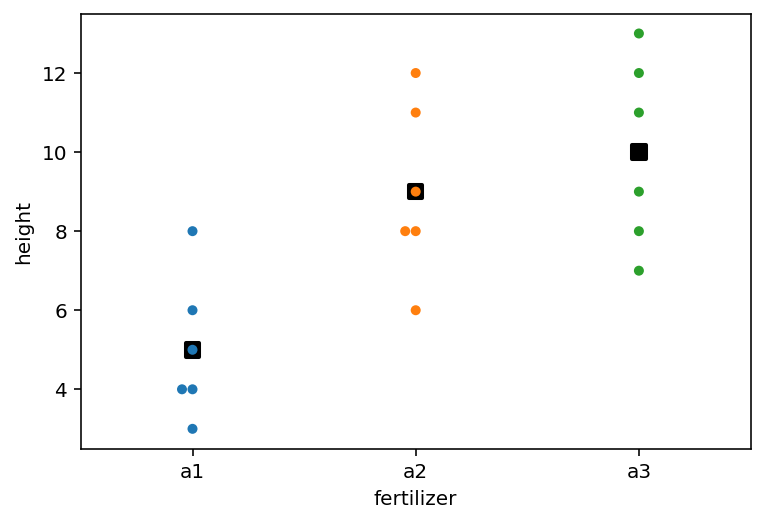

In [57]:
sns.swarmplot(x='fertilizer', y='height', data=df)
sns.pointplot(x='fertilizer', y='height', data=dm.reset_index(), join=False, markers='s', color='black');

## ANOVA

In [58]:
m=smf.ols(formula='height ~ C(fertilizer)', data=df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9.265
Date:                Sat, 08 Oct 2022   Prob (F-statistic):            0.00240
Time:                        18:16:41   Log-Likelihood:                -37.503
No. Observations:                  18   AIC:                             81.01
Df Residuals:                      15   BIC:                             83.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.0000    

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Hypothesis
$$H_0: \mu_{a1} = \mu_{a2} = \mu_{a3}$$
$$H_1: \text{not all means are equal}$$

In [59]:
sm.stats.anova_lm(m)

,df,sum_sq,mean_sq,F,PR(>F)
C(fertilizer),2.0,84.0,42.000000,9.264706,0.002399
Residual,15.0,68.0,4.533333,NaN,NaN


## Tukey Honest Significant Differences (TukeyHSD)

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [61]:
df['height']

0      6
1      8
2      4
3      5
4      3
5      4
6      8
7     12
8      9
9     11
10     6
11     8
12    13
13     9
14    11
15     8
16     7
17    12
Name: height, dtype: int64

In [62]:
df['fertilizer']

0     a1
1     a1
2     a1
3     a1
4     a1
5     a1
6     a2
7     a2
8     a2
9     a2
10    a2
11    a2
12    a3
13    a3
14    a3
15    a3
16    a3
17    a3
Name: fertilizer, dtype: object

In [63]:
phoc=pairwise_tukeyhsd(df['height'], df['fertilizer'])
print(phoc)
# a2 and a3 --> Not reject H0 --> Mu_a2 = Mu_a3

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    a1     a2      4.0 0.0139  0.8083 7.1917   True
    a1     a3      5.0 0.0027  1.8083 8.1917   True
    a2     a3      1.0 0.6899 -2.1917 4.1917  False
---------------------------------------------------


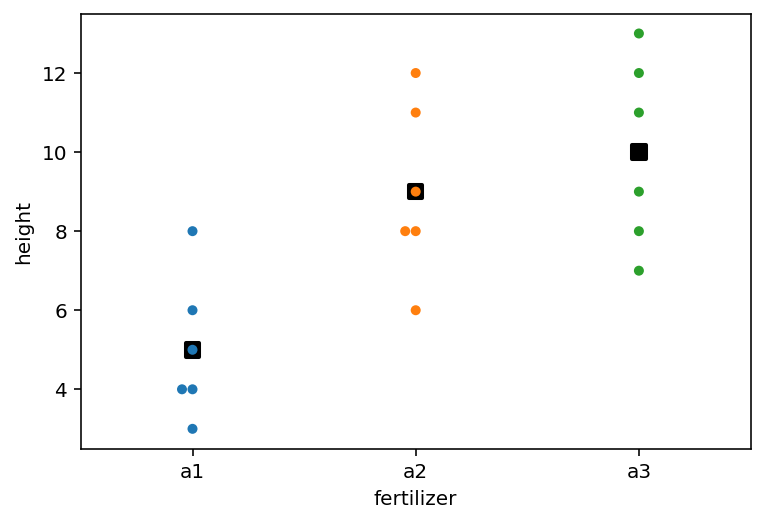

In [64]:
sns.swarmplot(x='fertilizer', y='height', data=df)
sns.pointplot(x='fertilizer', y='height', data=dm.reset_index(), join=False, markers='s', color='black');